### Refs
- [RDKit Documentation](https://www.rdkit.org/docs/GettingStartedInPython.html)
- [PubChem](https://pubchem.ncbi.nlm.nih.gov/) - find SDF files for molecules
- [YouTube Tutorial](https://www.youtube.com/watch?v=NozaWUkJ3YM)

### Workflow Suggestions
> After modifying classes from `src` directory, **Restart NoteBook Kernel** is required 
- Recommended action after changing files in `src`: Restart -> Run All

## Imports

In [4]:
from src.loader import SDFLoader
from src.core.molecule import MBMolecule
from src.utils.renderer import Renderer
from src.utils.ui import Theme
from rdkit.Chem import Mol


## RDkit Diamag Calcs


In [5]:
SDF_TEST = [
    {
        'sdf_file': 'chlorobenzene.sdf',
        'expected_diamag': -72.19
    },
    {
        'sdf_file': 'chalconatronate.sdf',
        'expected_diamag': -313.4
    },
]

[INF] chlorobenzene.sdf: Diamag OK - "chlorobenzene.sdf": -72.1900

[ERR] chalconatronate.sdf: ❌ result -10.46 is not expected value: -313.4
[ERR] chalconatronate.sdf: 


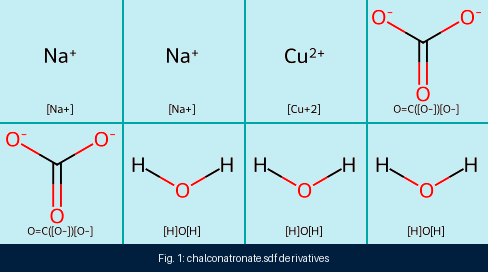

In [6]:
# Iterate through all predefined SDF test cases

for test_case in SDF_TEST:
    # Load all MBMolecule instances from the given SDF file
    mols: list[MBMolecule] = SDFLoader.load(test_case['sdf_file'])

    # Compute total diamagnetic contribution across all molecules
    sum_dia_contr = 0
    for mol in mols:
        sum_dia_contr += mol.CalcDiamagContr(verbose=False)   # silent accumulation
        result = mol.CalcDiamagContr()                        # last computed molecule result

    # Validation and reporting
    try:
        # Check that computed result matches expected reference value
        assert round(result, 2) == test_case["expected_diamag"]
        print(f"[INF] {test_case['sdf_file']}: Diamag OK - \"{test_case['sdf_file']}\": {sum_dia_contr:.4f}\n")

    except Exception as e:
        # Log failure with computed vs expected values
        print(f"[ERR] {test_case['sdf_file']}: ❌ result {round(result, 2)} is not expected value: {test_case['expected_diamag']}")
        print(f"[ERR] {test_case['sdf_file']}: ")
        rdkit_mols: list[Mol] = [mol.ToRDKit() for mol in mols]
        display(Renderer(Theme.Sea).GetMoleculesGridImg(rdkit_mols, label=f"Fig. 1: {test_case['sdf_file']} derivatives"))

